In [5]:
!rm -rf /content/*.json

In [3]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle

Saving kaggle.json to kaggle (2).json


In [4]:
!kaggle datasets download -d devzohaib/tvmarketingcsv

  0% 0.00/74.2k [00:00<?, ?B/s]
100% 74.2k/74.2k [00:00<00:00, 63.2MB/s]


In [6]:
from zipfile import ZipFile
with ZipFile("/content/tvmarketingcsv.zip", "r") as zipObj:
  zipObj.extractall()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("tvmarketing.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(dataset)

        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'TV vs Sales')

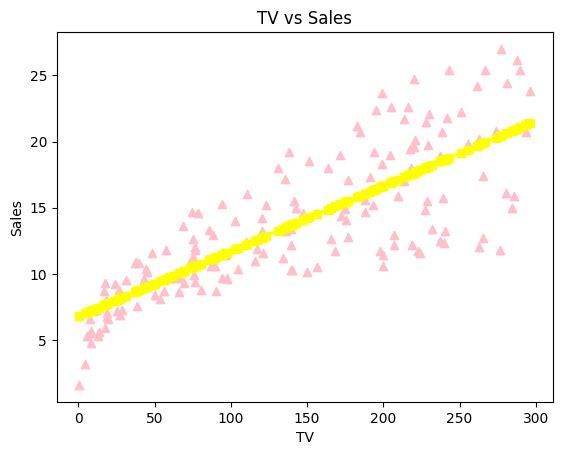

In [19]:
plt.scatter(X_train, y_train, color="pink", marker="^")
plt.plot(X_train, regressor.predict(X_train), marker="s", color="yellow")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

Text(0.5, 1.0, 'TV vs Sales')

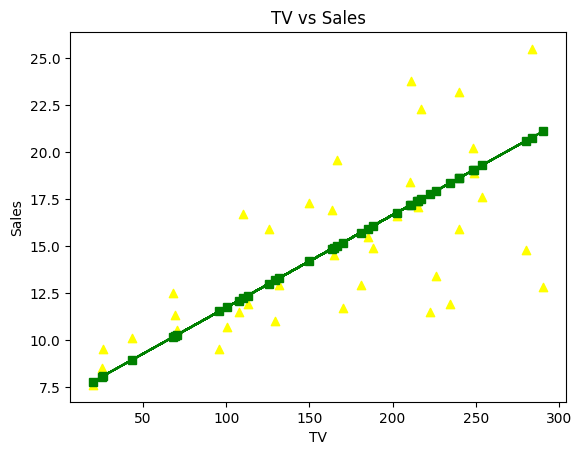

In [20]:
plt.scatter(X_test, y_test, color="yellow", marker="^")
plt.plot(X_test, regressor.predict(X_test), marker="s", color="green")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

In [21]:
print(regressor.predict([[8.7]]))

[7.22846678]
